In [3]:
library(data.table)

In [4]:
library(ggplot2)

In [5]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
options(scipen=999)

# Sampling registered user revisions to plot out time difference between edits

In [7]:
sample_registered_user_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_registered_user_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [8]:
head(sample_registered_user_revision_session_data[session_index == 374,], n=30)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index
135599,20140911071930,156801636,20140911071918,20140911060003,20140911084047,374,297,260
5183,20150727220624,236881227,20150727220615,20150727210039,20150727222358,374,224,179
161984,20141212100349,180447160,20141212100348,20141212081127,20141212101711,374,6393,5703
161984,20141212083532,180433788,20141212083531,20141212081127,20141212101711,374,6393,714
1529466,20161230185053,422679375,20161230185052,20161230081837,20161231015713,374,52512,23514
690508,20150526114248,219408497,20150526114246,20150526095356,20150526114539,374,3019,2952
1529466,20161230141943,422603947,20161230141942,20161230081837,20161231015713,374,52512,11445
283443,20151122040549,275720620,20151122040549,20151122032429,20151122051123,374,117,89
201135,20160617054524,348366265,20160617054509,20160617045006,20160617055431,374,74,42
587697,20140322172059,117536508,20140322171911,20140322170020,20140322233106,374,265,24


In [9]:
sample_registered_user_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [10]:
sample_registered_user_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [11]:
sample_registered_user_revision_session_data$time_difference <- as.numeric(sample_registered_user_revision_session_data$updated_timestamp - sample_registered_user_revision_session_data$updated_previous_timestamp)

In [12]:
sample_registered_user_revision_session_data$log_time_difference <- log10(sample_registered_user_revision_session_data$time_difference + 1)

In [13]:
attach(sample_registered_user_revision_session_data)

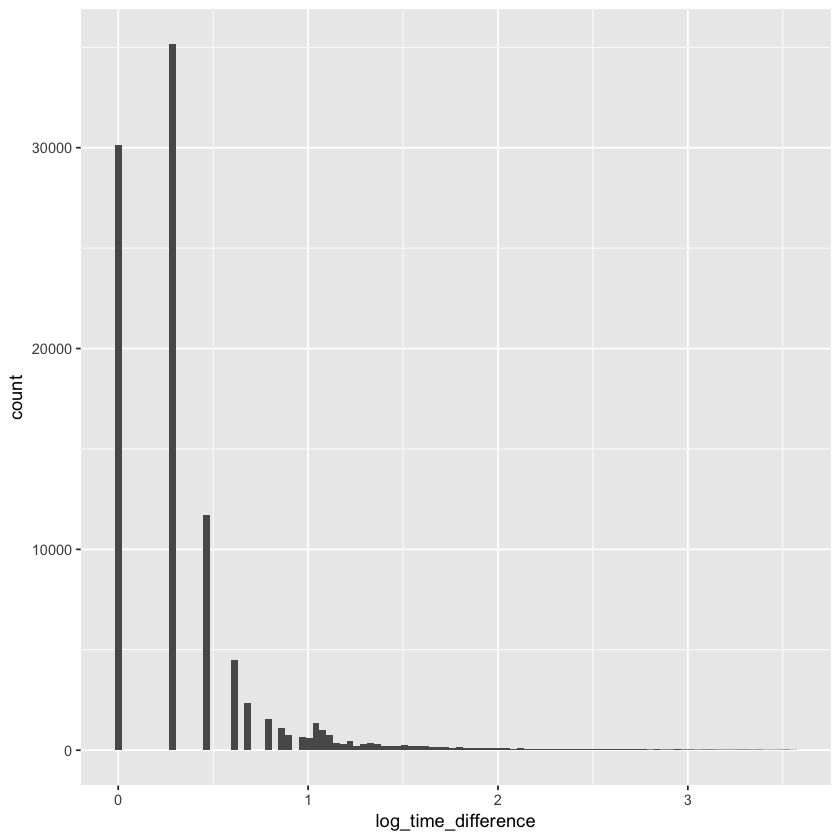

In [14]:
ggplot(sample_registered_user_revision_session_data[prev_timestamp != 'NULL',],aes(x=log_time_difference)) + geom_histogram(bins=100)

In [15]:
detach(sample_registered_user_revision_session_data)

In [16]:
head(sample_registered_user_revision_session_data$updated_timestamp)

[1] "2014-11-05 03:23:06 CST" "2014-10-23 18:34:59 CDT"
[3] "2015-12-31 21:14:48 CST" "2015-11-16 22:11:53 CST"
[5] "2016-10-12 13:23:03 CDT" "2015-05-27 20:05:55 CDT"

In [17]:
head(sample_registered_user_revision_session_data$updated_timestamp.mon)

NULL

In [19]:
# head(sample_registered_user_revision_session_data$updated_timestamp$mon)

In [21]:
head(format(sample_registered_user_revision_session_data$updated_timestamp,"%m"))

[1] "11" "10" "12" "11" "10" "05"

In [ ]:
# other types

In [66]:
sample_human_revision_session_data <- data.table(read.table("~/Desktop/human_events.tsv", header=TRUE, sep="\t"))

In [67]:
sample_human_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [68]:
sample_human_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_human_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [69]:
sample_human_revision_session_data$time_difference <- as.numeric(sample_human_revision_session_data$updated_timestamp - sample_human_revision_session_data$updated_previous_timestamp)

In [70]:
sample_human_revision_session_data$log_time_difference <- log10(sample_human_revision_session_data$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [71]:
attach(sample_human_revision_session_data)

The following objects are masked from sample_human_revision_session_data (pos = 3):

    edit_type, event_index, log_time_difference, prev_timestamp,
    revision_id, session_end, session_events, session_index,
    session_start, time_difference, timestamp,
    updated_previous_timestamp, updated_timestamp, user

The following objects are masked from sample_bot_revision_session_data:

    edit_type, event_index, log_time_difference, prev_timestamp,
    revision_id, session_end, session_events, session_index,
    session_start, time_difference, timestamp,
    updated_previous_timestamp, updated_timestamp, user

The following objects are masked from sample_anon_revision_session_data:

    event_index, log_time_difference, prev_timestamp, revision_id,
    session_end, session_events, session_index, session_start,
    time_difference, timestamp, updated_previous_timestamp,
    updated_timestamp, user



In [91]:
sample_human_revision_session_data_standard_deviation = summarize(group_by(sample_human_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user, session_start), standard_deviation = sd(time_difference))

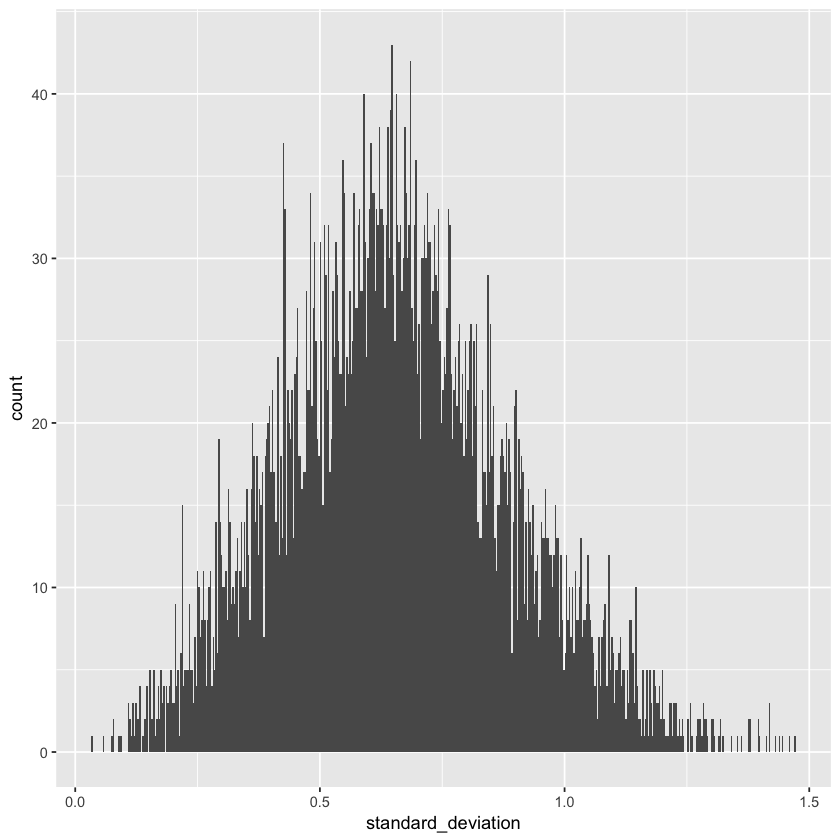

In [73]:
ggplot(sample_human_revision_session_data_standard_deviation,aes(x=standard_deviation)) + geom_histogram(bins=500)

In [74]:
sample_human_revision_session_data$group = 'human'

In [75]:
detach(sample_human_revision_session_data)

In [39]:
sample_bot_revision_session_data <- data.table(read.table("~/Desktop/bot_events.tsv", header=TRUE, sep="\t"))

In [64]:
summary(sample_bot_revision_session_data)

    edit_type            user         timestamp             
 bot_edit:2386536   Min.   : 7801   Min.   :20130402190200  
                    1st Qu.:39601   1st Qu.:20130501054600  
                    Median :39601   Median :20130511195600  
                    Mean   :39600   Mean   :20130540971100  
                    3rd Qu.:39601   3rd Qu.:20130519054300  
                    Max.   :39601   Max.   :20160410205600  
                                                            
  revision_id               prev_timestamp    session_start           
 Min.   : 18777619   NULL          :     72   Min.   :20130402190200  
 1st Qu.: 33162470   20130408231733:      3   1st Qu.:20130430202900  
 Median : 40080592   20130408231757:      3   Median :20130506174100  
 Mean   : 41181630   20130408232129:      3   Mean   :20130530205600  
 3rd Qu.: 43991769   20130408232202:      3   3rd Qu.:20130506174100  
 Max.   :320689112   20130408232822:      3   Max.   :20160410201700  
               

In [65]:
sample_bot_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_bot_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
sample_bot_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_bot_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [42]:
sample_bot_revision_session_data$time_difference <- as.numeric(sample_bot_revision_session_data$updated_timestamp - sample_bot_revision_session_data$updated_previous_timestamp)

In [43]:
sample_bot_revision_session_data$log_time_difference <- log10(sample_bot_revision_session_data$time_difference + 1)

In [44]:
attach(sample_bot_revision_session_data)

The following objects are masked from sample_anon_revision_session_data:

    event_index, log_time_difference, prev_timestamp, revision_id,
    session_end, session_events, session_index, session_start,
    time_difference, timestamp, updated_previous_timestamp,
    updated_timestamp, user



In [48]:
sample_bot_revision_session_data_standard_deviation = summarize(group_by(sample_bot_revision_session_data[prev_timestamp != 'NULL' & time_difference >= 0,], user, session_start), standard_deviation = sd(log_time_difference))

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”

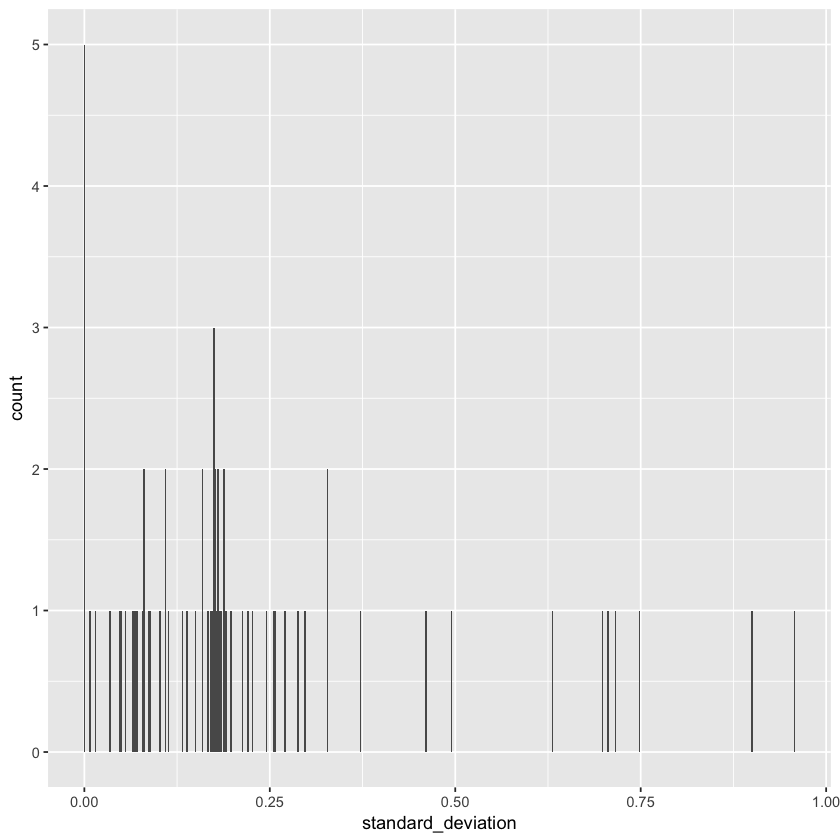

In [49]:
ggplot(sample_bot_revision_session_data_standard_deviation,aes(x=standard_deviation)) + geom_histogram(bins=500)

In [ ]:
detach(sample_bot_revision_session_data)

# Sampling anon revisions to plot out time difference between edits

In [76]:
sample_anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [77]:
sample_anon_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [78]:
sample_anon_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [79]:
sample_anon_revision_session_data$time_difference <- as.numeric(sample_anon_revision_session_data$updated_timestamp - sample_anon_revision_session_data$updated_previous_timestamp)

In [80]:
sample_anon_revision_session_data$log_time_difference <- log10(sample_anon_revision_session_data$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [81]:
attach(sample_anon_revision_session_data)

The following objects are masked from sample_human_revision_session_data:

    event_index, log_time_difference, prev_timestamp, revision_id,
    session_end, session_events, session_index, session_start,
    time_difference, timestamp, updated_previous_timestamp,
    updated_timestamp, user

The following objects are masked from sample_bot_revision_session_data:

    event_index, log_time_difference, prev_timestamp, revision_id,
    session_end, session_events, session_index, session_start,
    time_difference, timestamp, updated_previous_timestamp,
    updated_timestamp, user

The following objects are masked from sample_anon_revision_session_data (pos = 5):

    event_index, log_time_difference, prev_timestamp, revision_id,
    session_end, session_events, session_index, session_start,
    time_difference, timestamp, updated_previous_timestamp,
    updated_timestamp, user



In [90]:
sample_anon_revision_session_data_standard_deviation = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user, session_start), standard_deviation = sd(time_difference))

In [93]:
sample_human_revision_session_data_standard_deviation$group = 'human'
sample_anon_revision_session_data_standard_deviation$group = 'anon'


In [94]:
sample_human_revision_session_data_standard_deviation$user = as.character(sample_human_revision_session_data_standard_deviation$user)

In [100]:
mean(sample_human_revision_session_data$time_difference <=5, na.rm=TRUE)

[1] 0.1468379

Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

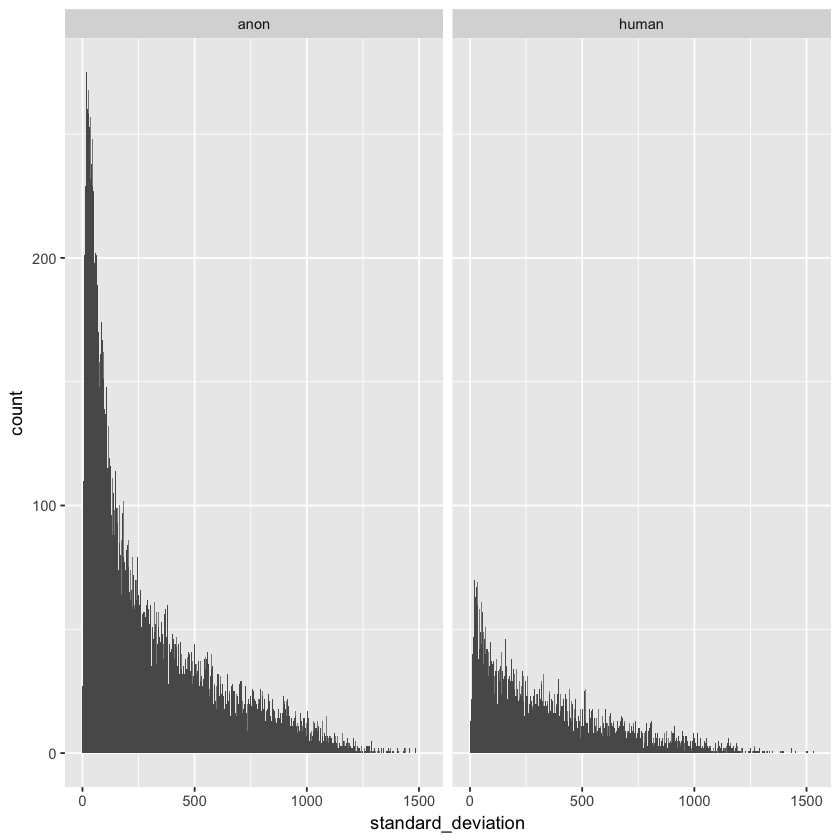

In [95]:
ggplot(rbind(sample_human_revision_session_data_standard_deviation,sample_anon_revision_session_data_standard_deviation),aes(x=standard_deviation)) + facet_wrap(~group) + geom_histogram(bins=500)

In [14]:
sample_anon_revision_session_data_standard_deviation[sample_anon_revision_session_data_standard_deviation$user == '150.254.210.213',]

user,session_start,standard_deviation
150.254.210.213,20130701235102,0.02887786
150.254.210.213,20130717091320,0.36545633
150.254.210.213,20130829091540,0.13779059
150.254.210.213,20130829202421,0.11885195
150.254.210.213,20130830070801,0.08932838
150.254.210.213,20130831005116,0.01318631


In [15]:
head(sample_anon_revision_session_data_standard_deviation[order(sample_anon_revision_session_data_standard_deviation$standard_deviation),])

user,session_start,standard_deviation
76.8.204.187,20130309173737,0.00000000
91.198.174.211,20121202050457,0.00000000
150.254.210.213,20130831005116,0.01318631
112.203.160.147,20130623071509,0.01739032
187.189.169.190,20161027145445,0.02089213
112.203.160.147,20130623054004,0.02694538


In [16]:
sample_anon_revision_session_mean = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & time_difference >= 0,], user), mean_log_time_difference = mean(log_time_difference))

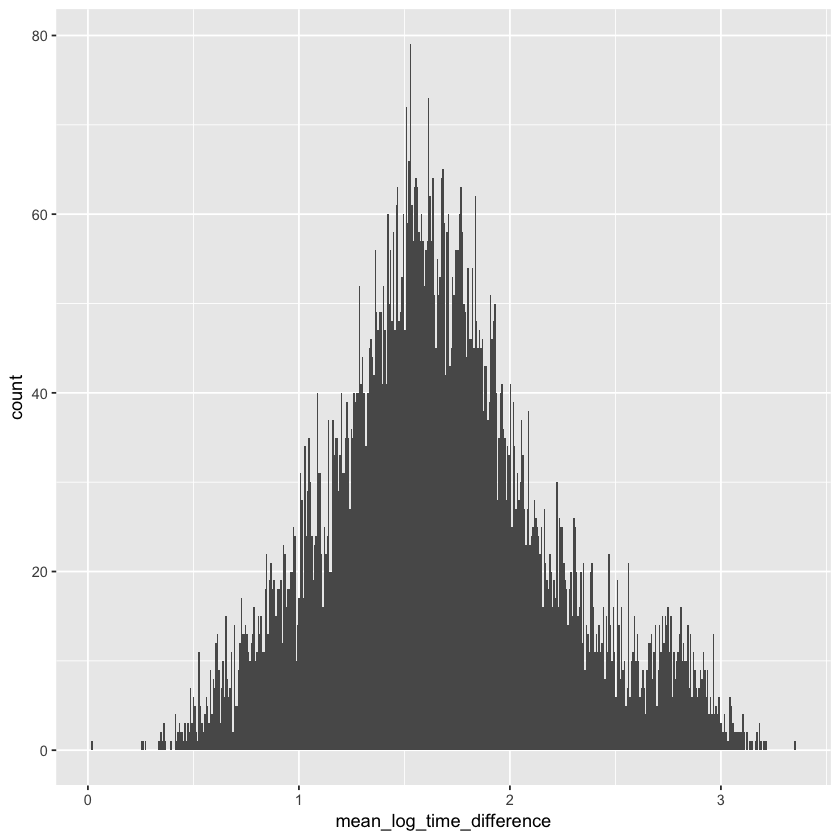

In [17]:
ggplot(sample_anon_revision_session_mean,aes(x=mean_log_time_difference)) + geom_histogram(bins=500)

In [18]:
nrow(sample_anon_revision_session_data[timestamp == prev_timestamp,])

[1] 20756

In [19]:
nrow(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & is.na(log_time_difference),])

[1] 1

In [105]:
head(sample_anon_revision_session_data)

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
93.220.76.159,20121029172824,25,NULL,20121029172824,20121029181646,0,2,0,2012-10-29 17:28:24,NA,NA,NA
93.220.76.159,20121029181646,102,20121029172824,20121029172824,20121029181646,0,2,1,2012-10-29 18:16:46,2012-10-29 17:28:24,2902,3.462847
193.40.10.178,20121029174206,54,NULL,20121029174206,20121029180514,0,4,0,2012-10-29 17:42:06,NA,NA,NA
193.40.10.178,20121029174358,56,20121029174206,20121029174206,20121029180514,0,4,1,2012-10-29 17:43:58,2012-10-29 17:42:06,112,2.053078
193.40.10.178,20121029174425,58,20121029174358,20121029174206,20121029180514,0,4,2,2012-10-29 17:44:25,2012-10-29 17:43:58,27,1.447158
193.40.10.178,20121029180514,71,20121029174425,20121029174206,20121029180514,0,4,3,2012-10-29 18:05:14,2012-10-29 17:44:25,1249,3.096910


Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

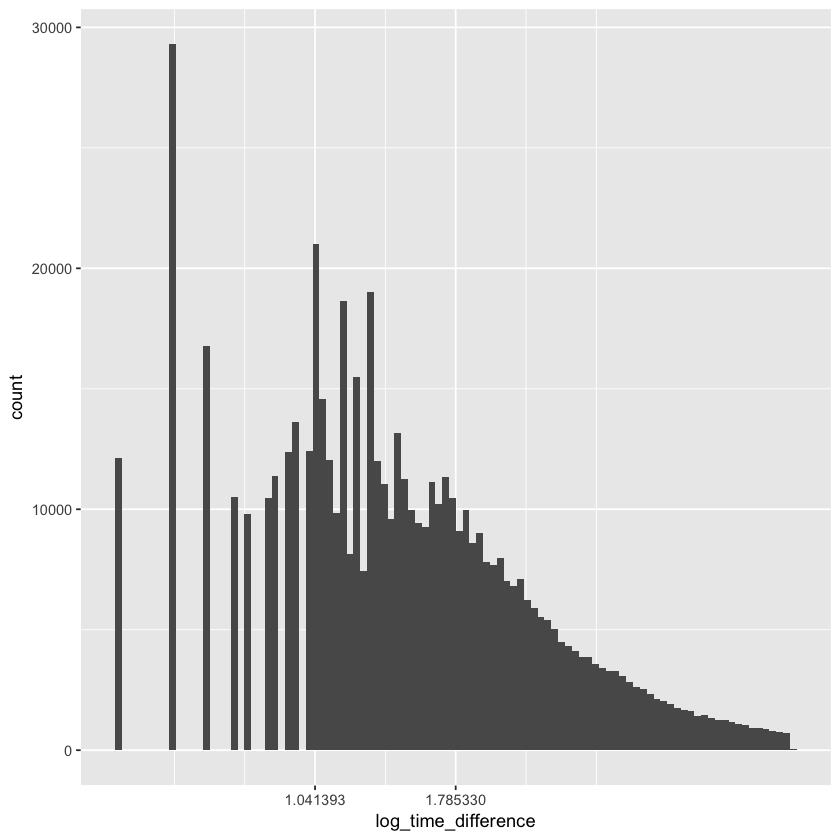

In [114]:
ggplot(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10,],aes(x=log_time_difference)) +
geom_histogram(bins=100) + 
scale_x_continuous(breaks=log10(c(10,60) + 1))

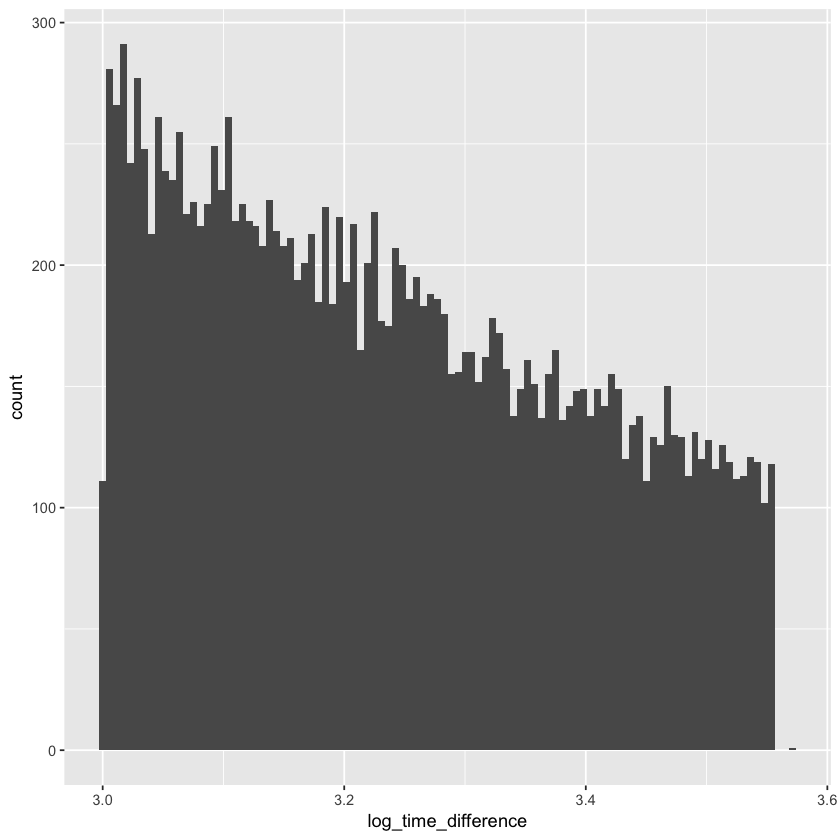

In [21]:
# just between 1 and 2
ggplot(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 3,],aes(x=log_time_difference)) + geom_histogram(bins=100)

In [22]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 0 &  log_time_difference == 0,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [23]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference == .3010300,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [24]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference == .4771213,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference


In [30]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 0 &  log_time_difference <= .5,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
127.0.0.1,20121029181849,116,20121029181848,20121029181848,20121029181849,0,18,12,2012-10-29 18:18:49,2012-10-29 18:18:48,1,0.3010300
151.41.160.140,20121030221544,12935,20121030221542,20121030221531,20121030221607,0,18,3,2012-10-30 22:15:44,2012-10-30 22:15:42,2,0.4771213
151.41.160.140,20121030221551,12941,20121030221549,20121030221531,20121030221607,0,18,5,2012-10-30 22:15:51,2012-10-30 22:15:49,2,0.4771213
151.41.160.140,20121030221552,12942,20121030221551,20121030221531,20121030221607,0,18,6,2012-10-30 22:15:52,2012-10-30 22:15:51,1,0.3010300
151.41.160.140,20121030221554,12943,20121030221552,20121030221531,20121030221607,0,18,7,2012-10-30 22:15:54,2012-10-30 22:15:52,2,0.4771213
151.41.160.140,20121030221555,12944,20121030221554,20121030221531,20121030221607,0,18,8,2012-10-30 22:15:55,2012-10-30 22:15:54,1,0.3010300


In [38]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 1 &  log_time_difference <= 1.05,])

updated_previous_timestamp,user,session_events,event_index,session_end,revision_id,session_index,prev_timestamp,session_start,updated_timestamp,time_difference,log_time_difference,timestamp
2012-10-30 14:45:37,84.98.132.83,17,15,20121030144649,4001,0,20121030144537,20121030143235,2012-10-30 14:45:47,10,1.041393,20121030144547
2012-11-01 12:08:27,217.255.27.137,21,20,20121101120837,274381,0,20121101120827,20121101115902,2012-11-01 12:08:37,10,1.041393,20121101120837
2012-11-04 08:40:52,93.146.216.252,20,17,20121104084211,318625,0,20121104084052,20121104083404,2012-11-04 08:41:02,10,1.041393,20121104084102
2012-11-04 14:09:35,81.249.226.3,144,32,20121104143551,321967,0,20121104140935,20121104140117,2012-11-04 14:09:45,10,1.041393,20121104140945
2012-11-04 14:15:12,81.249.226.3,144,50,20121104143551,322057,0,20121104141512,20121104140117,2012-11-04 14:15:22,10,1.041393,20121104141522
2012-11-04 14:20:04,81.249.226.3,144,70,20121104143551,322122,0,20121104142004,20121104140117,2012-11-04 14:20:14,10,1.041393,20121104142014
2012-11-04 14:24:51,81.249.226.3,144,91,20121104143551,322188,0,20121104142451,20121104140117,2012-11-04 14:25:01,10,1.041393,20121104142501
2012-11-04 14:25:24,81.249.226.3,144,95,20121104143551,322199,0,20121104142524,20121104140117,2012-11-04 14:25:34,10,1.041393,20121104142534
2012-11-04 14:27:02,81.249.226.3,144,104,20121104143551,322230,0,20121104142702,20121104140117,2012-11-04 14:27:12,10,1.041393,20121104142712
2012-11-04 14:28:20,81.249.226.3,144,110,20121104143551,322241,0,20121104142820,20121104140117,2012-11-04 14:28:30,10,1.041393,20121104142830


In [37]:
sample(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 1.31 &  log_time_difference <= 1.325,],10)

event_index,updated_previous_timestamp,revision_id,timestamp,prev_timestamp,time_difference,session_start,log_time_difference,session_events,updated_timestamp
19,2012-10-30 18:55:14,8429,20121030185534,20121030185514,20,20121030183050,1.322219,30,2012-10-30 18:55:34
15,2012-10-31 12:55:04,135422,20121031125524,20121031125504,20,20121031124637,1.322219,22,2012-10-31 12:55:24
20,2012-10-31 22:04:25,268471,20121031220445,20121031220425,20,20121031213746,1.322219,34,2012-10-31 22:04:45
3,2012-11-01 11:59:53,274223,20121101120013,20121101115953,20,20121101115902,1.322219,21,2012-11-01 12:00:13
19,2012-11-01 12:08:07,274379,20121101120827,20121101120807,20,20121101115902,1.322219,21,2012-11-01 12:08:27
9,2012-11-02 15:23:35,294319,20121102152355,20121102152335,20,20121102151029,1.322219,11,2012-11-02 15:23:55
2,2012-11-03 05:39:15,305913,20121103053935,20121103053915,20,20121103053856,1.322219,12,2012-11-03 05:39:35
10,2012-11-04 14:03:10,321874,20121104140330,20121104140310,20,20121104140117,1.322219,144,2012-11-04 14:03:30
17,2012-11-04 14:05:33,321897,20121104140553,20121104140533,20,20121104140117,1.322219,144,2012-11-04 14:05:53
63,2012-11-04 14:18:25,322102,20121104141845,20121104141825,20,20121104140117,1.322219,144,2012-11-04 14:18:45


In [28]:
head(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10 & log_time_difference > 3,])

user,timestamp,revision_id,prev_timestamp,session_start,session_end,session_index,session_events,event_index,updated_timestamp,updated_previous_timestamp,time_difference,log_time_difference
91.86.14.28,20121030150809,4231,20121030144223,20121030144223,20121030151457,0,11,1,2012-10-30 15:08:09,2012-10-30 14:42:23,1546,3.189490
88.153.45.108,20121030195619,9788,20121030191416,20121030183050,20121030195713,1,30,27,2012-10-30 19:56:19,2012-10-30 19:14:16,2523,3.402089
93.220.68.150,20121030220909,12731,20121030214544,20121030213050,20121030221017,1,11,9,2012-10-30 22:09:09,2012-10-30 21:45:44,1405,3.147985
93.220.101.47,20121106171027,344138,20121106164653,20121106164620,20121106171246,0,13,4,2012-11-06 17:10:27,2012-11-06 16:46:53,1414,3.150756
83.206.120.18,20121107175156,356133,20121107171149,20121107165853,20121107175756,3,16,12,2012-11-07 17:51:56,2012-11-07 17:11:49,2407,3.381656
130.88.141.34,20121109171610,376234,20121109165425,20121109162207,20121109172253,3,59,51,2012-11-09 17:16:10,2012-11-09 16:54:25,1305,3.115943


In [28]:
detach(sample_anon_revision_session_data)

# Registered user event lengths

In [29]:
registered_user_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [30]:
registered_user_mwsessions_results$start_time <- as.POSIXct(as.character(registered_user_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [31]:
registered_user_mwsessions_results$end_time <- as.POSIXct(as.character(registered_user_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [32]:
registered_user_mwsessions_results$time_difference <- as.numeric(registered_user_mwsessions_results$end_time - registered_user_mwsessions_results$start_time)

In [33]:
registered_user_mwsessions_results$log_time_difference <- log10(registered_user_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [34]:
nrow(registered_user_mwsessions_results[time_difference < 0,])

[1] 44

In [35]:
attach(registered_user_mwsessions_results)

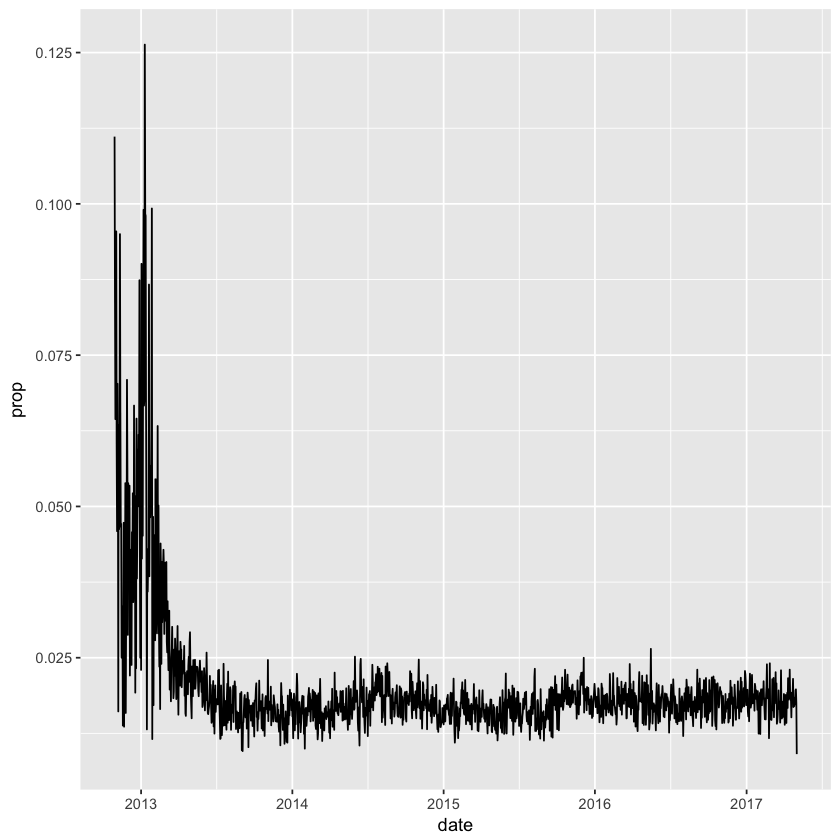

In [36]:
ggplot(registered_user_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”

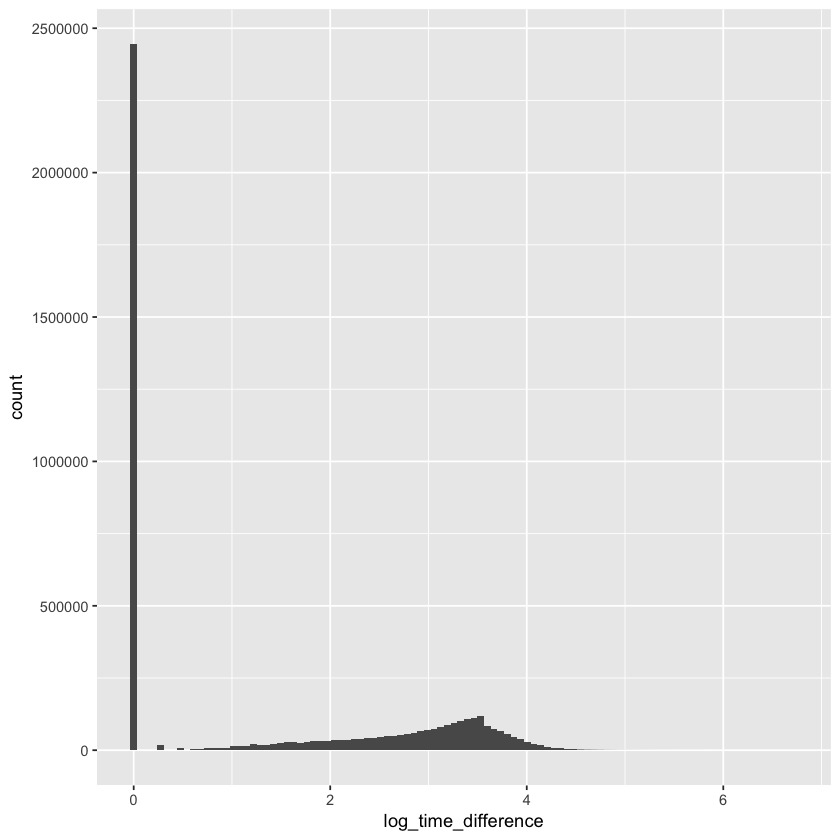

In [37]:
ggplot(registered_user_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)

In [38]:
detach(registered_user_mwsessions_results)

# Anon event lengths

In [39]:
anon_mwsessions_results <- data.table(read.table("~/Desktop/temp", header=TRUE, sep="\t"))

In [40]:
anon_mwsessions_results$start_time <- as.POSIXct(as.character(anon_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
anon_mwsessions_results$end_time <- as.POSIXct(as.character(anon_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [42]:
anon_mwsessions_results$time_difference <- as.numeric(anon_mwsessions_results$end_time - anon_mwsessions_results$start_time)

In [43]:
anon_mwsessions_results$log_time_difference <- log10(anon_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [44]:
nrow(anon_mwsessions_results[time_difference < 0,])

[1] 1

In [45]:
attach(anon_mwsessions_results)

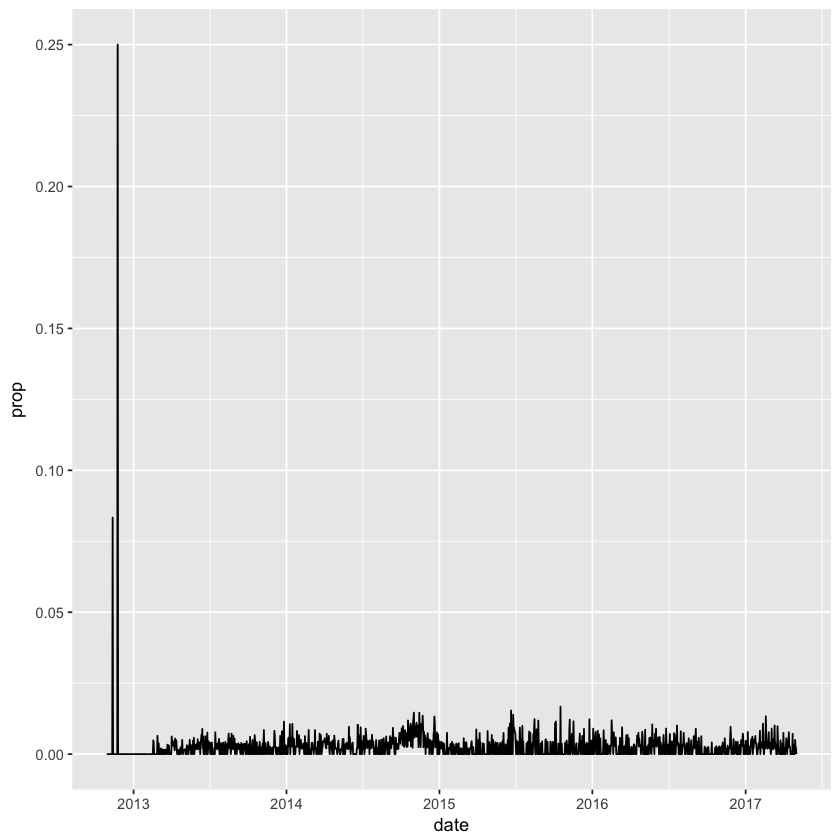

In [46]:
ggplot(anon_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

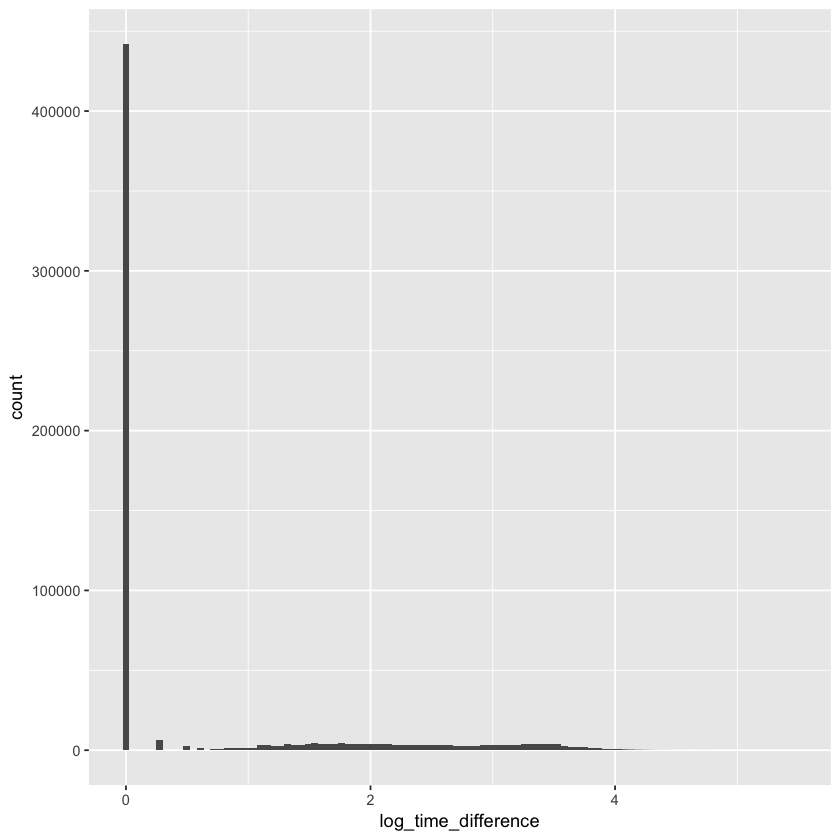

In [47]:
ggplot(anon_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)

# Anon event statistics

In [48]:
max(events)

[1] 11017

In [49]:
nrow(anon_mwsessions_results)

[1] 633128

In [50]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events==1)

In [51]:
nrow(sessions_with_more_than_10_events)

[1] 439896

In [52]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events>10)

In [53]:
nrow(sessions_with_more_than_10_events)

[1] 16272

In [54]:
sessions_with_more_than_20_events <- subset(anon_mwsessions_results, events>20)

In [55]:
nrow(sessions_with_more_than_20_events)

[1] 7097

In [56]:
sessions_with_more_than_50_events <- subset(anon_mwsessions_results, events>50)

In [57]:
nrow(sessions_with_more_than_50_events)

[1] 2072

In [58]:
sessions_with_more_than_100_events <- subset(anon_mwsessions_results, events>100)

In [59]:
nrow(sessions_with_more_than_100_events)

[1] 736

In [60]:
sum(anon_mwsessions_results$events)/sum(anon_mwsessions_results$events)

[1] 1

In [61]:
sum(anon_mwsessions_results$events)

[1] 1572831

In [62]:
sorted_anon_mwsessions_results <- anon_mwsessions_results[order(-events),]

In [63]:
head(sorted_anon_mwsessions_results, n=10)

user,start,end,index,events,start_time,end_time,time_difference,log_time_difference
10.68.17.174,20141123042702,20141126071956,40,11017,2014-11-23 04:27:02,2014-11-26 07:19:56,269574,5.430680
72.29.167.158,20130622114232,20130623073344,0,6971,2013-06-22 11:42:32,2013-06-23 07:33:44,71472,4.854142
185.54.115.189,20151112211127,20151113081803,0,3272,2015-11-12 21:11:27,2015-11-13 08:18:03,39996,4.602027
150.254.210.213,20130830070801,20130830235054,4,2591,2013-08-30 07:08:01,2013-08-30 23:50:54,60173,4.779409
89.122.248.53,20150821131251,20150824213721,4,2560,2015-08-21 13:12:51,2015-08-24 21:37:21,289470,5.461605
78.90.0.177,20150812232601,20150813050103,4,2538,2015-08-12 23:26:01,2015-08-13 05:01:03,20102,4.303261
87.170.223.74,20160223101534,20160224152634,1,2250,2016-02-23 10:15:34,2016-02-24 15:26:34,105060,5.021442
10.68.17.61,20141110192855,20141111003652,0,2214,2014-11-10 19:28:55,2014-11-11 00:36:52,18477,4.266655
150.254.210.213,20130701235102,20130702114051,0,2121,2013-07-01 23:51:02,2013-07-02 11:40:51,42589,4.629308
10.68.17.174,20141122054826,20141122235430,38,1865,2014-11-22 05:48:26,2014-11-22 23:54:30,65164,4.814014


In [64]:
sorted_anon_mwsessions_results[1,]$start

[1] 20141123042702

In [65]:
sorted_anon_mwsessions_results[1,]$end

[1] 20141126071956

In [66]:
sorted_anon_mwsessions_results[3,]$start

[1] 20151112211127

In [67]:
sorted_anon_mwsessions_results[3,]$end

[1] 20151113081803

In [68]:
data.table(subset(anon_mwsessions_results, user=='54.67.94.64'))[order(-events),]

user,start,end,index,events,start_time,end_time,time_difference,log_time_difference
54.67.94.64,20160409102426,20160409111917,64,7,2016-04-09 10:24:26,2016-04-09 11:19:17,3291,3.517460
54.67.94.64,20160531211027,20160531215028,103,5,2016-05-31 21:10:27,2016-05-31 21:50:28,2401,3.380573
54.67.94.64,20160601044815,20160601054316,104,4,2016-06-01 04:48:15,2016-06-01 05:43:16,3301,3.518777
54.67.94.64,20160826215757,20160826220355,154,4,2016-08-26 21:57:57,2016-08-26 22:03:55,358,2.555094
54.67.94.64,20160323045408,20160323054320,46,3,2016-03-23 04:54:08,2016-03-23 05:43:20,2952,3.470263
54.67.94.64,20160412043249,20160412044031,70,3,2016-04-12 04:32:49,2016-04-12 04:40:31,462,2.665581
54.67.94.64,20161213083038,20161213091425,220,3,2016-12-13 08:30:38,2016-12-13 09:14:25,2627,3.419625
54.67.94.64,20170122030937,20170122031758,235,3,2017-01-22 03:09:37,2017-01-22 03:17:58,501,2.700704
54.67.94.64,20160218074057,20160218083827,0,2,2016-02-18 07:40:57,2016-02-18 08:38:27,3450,3.537945
54.67.94.64,20160219054945,20160219062740,2,2,2016-02-19 05:49:45,2016-02-19 06:27:40,2275,3.357172


In [69]:
detach(anon_mwsessions_results)

# Misalignment bucketing by event by event length

In [70]:
anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [71]:
anon_revision_alignment <- data.table(read.table("../../results/sql_queries/misalignment_and_edits/anon_revision_alignment.tsv", header=FALSE, sep="\t"))

In [72]:
colnames(anon_revision_alignment) <- c('entity_id','revision_id','revision_user','quality_class', 'views_class')

In [73]:
anon_revision_session_data_and_alignment <- merge(anon_revision_session_data, anon_revision_alignment, by = "revision_id")

In [74]:
anon_revision_session_data_and_alignment$start_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [75]:
anon_revision_session_data_and_alignment$end_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [76]:
anon_revision_session_data_and_alignment$time_difference <- anon_revision_session_data_and_alignment$end_time - anon_revision_session_data_and_alignment$start_time

# less than 10

In [77]:
less_than_10_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference < 10,], user, session_start), number_of_aligned_revisions_bucket_1 = n())

In [78]:
less_than_10_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference < 10,], user, session_start), number_of_misaligned_revisions_bucket_1 = n())

In [79]:
less_than_10 <- merge(less_than_10_aligned, less_than_10_misaligned)

In [80]:
less_than_10$proportion_aligned_bucket_1 = less_than_10$number_of_aligned_revisions/(less_than_10$number_of_misaligned_revisions + less_than_10$number_of_aligned_revisions)

# between 10 and 99 seconds time difference bucket

In [81]:
from_10_to_99_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_aligned_revisions_bucket_2 = n())

In [82]:
from_10_to_99_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_misaligned_revisions_bucket_2 = n())

In [83]:
from_10_to_99 <- merge(from_10_to_99_aligned, from_10_to_99_misaligned)

In [84]:
from_10_to_99$proportion_aligned_bucket_2 = from_10_to_99$number_of_aligned_revisions/(from_10_to_99$number_of_misaligned_revisions + from_10_to_99$number_of_aligned_revisions)

# between 100 and 999 seconds time difference bucket 

In [85]:
from_100_to_999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_aligned_revisions_bucket_3 = n())

In [86]:
from_100_to_999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_misaligned_revisions_bucket_3 = n())

In [87]:
from_100_to_999 <- merge(from_100_to_999_aligned, from_100_to_999_misaligned)

In [88]:
from_100_to_999$proportion_aligned_bucket_3 = from_100_to_999$number_of_aligned_revisions/(from_100_to_999$number_of_misaligned_revisions + from_100_to_999$number_of_aligned_revisions)

# between 1000 and 9999 seconds time difference bucket 

In [89]:
from_1000_to_9999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_aligned_revisions_bucket_4 = n())

In [90]:
from_1000_to_9999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_misaligned_revisions_bucket_4 = n())

In [91]:
from_1000_to_9999 <- merge(from_1000_to_9999_aligned, from_1000_to_9999_misaligned)

In [92]:
from_1000_to_9999$proportion_aligned_bucket_4 = from_1000_to_9999$number_of_aligned_revisions/(from_1000_to_9999$number_of_misaligned_revisions + from_1000_to_9999$number_of_aligned_revisions)

# greater than or equal 10000 seconds time difference bucket 

In [93]:
greater_than_or_equal_10000_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference > 10000,], user, session_start), number_of_aligned_revisions_bucket_5 = n())

In [94]:
greater_than_or_equal_10000_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference > 10000,], user, session_start), number_of_misaligned_revisions_bucket_5 = n())

In [95]:
greater_than_or_equal_10000 <- merge(greater_than_or_equal_10000_aligned, greater_than_or_equal_10000_misaligned)

In [96]:
greater_than_or_equal_10000$proportion_aligned_bucket_5 = greater_than_or_equal_10000$number_of_aligned_revisions/(greater_than_or_equal_10000$number_of_misaligned_revisions + greater_than_or_equal_10000$number_of_aligned_revisions)

In [97]:
head(greater_than_or_equal_10000)

user,session_start,number_of_aligned_revisions_bucket_5,number_of_misaligned_revisions_bucket_5,proportion_aligned_bucket_5
10.4.1.102,20130820110544,5,398,0.01240695
10.4.1.125,20130916104144,381,323,0.54119318
10.4.1.65,20140225000014,965,721,0.57236062
10.64.0.127,20130311224842,162,413,0.28173913
10.64.0.127,20130527091350,66,108,0.37931034
10.68.16.133,20160311194108,690,226,0.75327511


In [98]:
anon_alignment_buckets = data.table(alignment_means = c(mean(less_than_10$proportion_aligned_bucket_1),
                                                     mean(from_10_to_99$proportion_aligned_bucket_2),
                                                     mean(from_100_to_999$proportion_aligned_bucket_3),
                                                     mean(from_1000_to_9999$proportion_aligned_bucket_4),
                                                     mean(greater_than_or_equal_10000$proportion_aligned_bucket_5)))

In [99]:
head(anon_alignment_buckets)

alignment_means
0.5041298
0.4966707
0.4820898
0.4669794
0.4483662
